In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

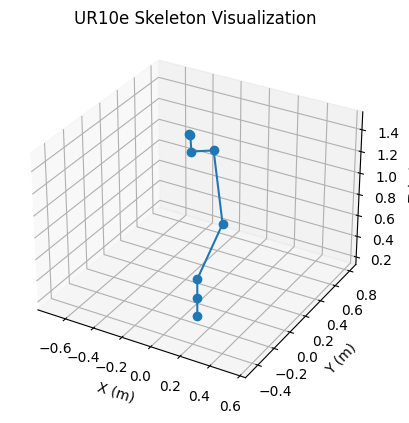

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Joint angles (radians)
q = np.array([2.2015, -1.7744, 1.1871, -2.0474, -1.5897, 2.0208])

# Link offsets (meters)
d1 = 0.181       # base to shoulder_pan
a2 = 0.176       # shoulder_pan to shoulder_lift (pre-rotation)
d2 = 0.613       # upper arm length
d3 = 0.571       # forearm to wrist1
a3 = 0.135       # wrist1 to wrist2
d4 = 0.12        # wrist2 to wrist3
ee_offset = 0.1  # wrist3 to end-effector

# Rotation about arbitrary axis
def rot(axis, theta):
    axis = np.array(axis) / np.linalg.norm(axis)
    x, y, z = axis
    c, s = np.cos(theta), np.sin(theta)
    C = 1 - c
    return np.array([
        [c + x*x*C,    x*y*C - z*s,  x*z*C + y*s],
        [y*x*C + z*s,  c + y*y*C,    y*z*C - x*s],
        [z*x*C - y*s,  z*y*C + x*s,  c + z*z*C]
    ])

# Fixed 90° rotation about local Y
R_y_90 = rot([0,1,0], np.pi/2)

# Compute positions
points = []
R = np.eye(3)
p = np.zeros(3)

# Base
points.append(p.copy())

# Joint 1: shoulder_pan
p = p + R.dot([0, 0, d1])
points.append(p.copy())
R = R.dot(rot([0,0,1], q[0]))

# Link to joint 2
p = p + R.dot([0, 0, a2])
points.append(p.copy())
R = R.dot(R_y_90).dot(rot([0,1,0], q[1]))

# Link to joint 3
p = p + R.dot([0, -0.137, d2])
points.append(p.copy())
R = R.dot(rot([0,1,0], q[2]))

# Link to joint 4
p = p + R.dot([0, 0, d3])
points.append(p.copy())
R = R.dot(R_y_90).dot(rot([0,1,0], q[3]))

# Link to joint 5
p = p + R.dot([0, a3, 0])
points.append(p.copy())
R = R.dot(rot([0,0,1], q[4]))

# Link to joint 6
p = p + R.dot([0, 0, d4])
points.append(p.copy())
R = R.dot(rot([0,1,0], q[5]))

# End-effector
p = p + R.dot([0, ee_offset, 0])
points.append(p.copy())

# Convert to array for plotting
pts = np.array(points)

# Plot skeleton
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pts[:,0], pts[:,1], pts[:,2], marker='o')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('UR10e Skeleton Visualization')

# Equal aspect ratio
max_range = np.ptp(pts, axis=0).max()
mid = pts.mean(axis=0)
ax.set_xlim(mid[0] - max_range/2, mid[0] + max_range/2)
ax.set_ylim(mid[1] - max_range/2, mid[1] + max_range/2)
ax.set_zlim(mid[2] - max_range/2, mid[2] + max_range/2)

plt.show()
